In [ ]:
#Loading an image
import numpy as np
import matplotlib.pyplot as plt
data = np.load("/home/kaiolae/code/word_models_keras_test/WorldModels/data_small_episodes/obs_data_doomrnn_1.npy")
one_image = data[9][154] #Image 22 from first rollout
plt.imshow(one_image)
#plt.plot()

In [14]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML


def plot_movie_mp4(image_array):
    dpi = 2.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    #fig = plt.figure(figsize=(1,1), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(HTML(anim.to_html5_video()))

In [ ]:
plot_movie_mp4(data[9])

## Setting an appropriate threshold

In [ ]:
# Measure Creativity by counting objects.
#Idea: Threshold the image. Count fireballs. Then threshold the INVERSE image, count monsters.
from skimage import io, filters, color, measure
from scipy import ndimage
import matplotlib.pyplot as plt

im = color.rgb2gray(one_image)
val = filters.threshold_otsu(im)
plt.hist(im.ravel(), bins=256)
plt.axvline(val, color='r') #Showing the image histogram and the adaptive threshold
plt.show()

In [ ]:
#As seen above, almost all pixels are below 0.4 Testing that as threshold. It captures all fireballs.
val = 0.4
binary = im>val
#drops = ndimage.binary_fill_holes(im < val)
#plt.imshow(drops, cmap='gray')
plt.imshow(binary, cmap='gray')
plt.show()

In [ ]:
#Threshold image indicates that monsters are probably below 0.22. Testing that as a negative threshold.
neg_thresh = 0.23 #Found by experimentation.
binary_black = im<neg_thresh
plt.imshow(binary_black, cmap='gray')
plt.show()

In [ ]:
#Counting monsters
monsters = ndimage.binary_fill_holes(binary_black > 0.5)
plt.imshow(monsters, cmap='gray')
labels = measure.label(monsters)
print(labels.max())

In [ ]:
#Counting fireballs
balls = ndimage.binary_fill_holes(binary > 0.5)
plt.imshow(balls, cmap='gray')
ball_labels = measure.label(balls)
print(ball_labels.max())

In [ ]:
#Testing my external library
from count_monsters_and_balls import count_monsters, count_fireballs
print(count_fireballs(one_image))
print(count_monsters(one_image))

## Classifying if we are in explosion-mode or not

In [1]:
#Loading an image
import numpy as np
import matplotlib.pyplot as plt
data = np.load("/home/kaiolae/code/word_models_keras_test/WorldModels/data_small_episodes/obs_data_doomrnn_1.npy")
explosion_image = data[9][162] #Image 22 from first rollout
plt.imshow(explosion_image) 
#plt.plot()


0.590368055300245


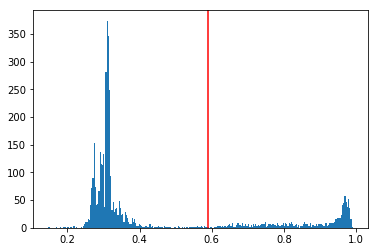

In [2]:
# Measure Creativity by counting objects.
#Idea: Threshold the image. Count fireballs. Then threshold the INVERSE image, count monsters.
from skimage import io, filters, color, measure
from scipy import ndimage
import matplotlib.pyplot as plt

im = color.rgb2gray(explosion_image)
val = filters.threshold_otsu(im)
print(val)
plt.hist(im.ravel(), bins=256)
plt.axvline(val, color='r') #Showing the image histogram and the adaptive threshold
plt.show()

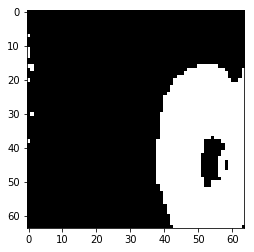

In [3]:
#As seen above, almost all pixels are below 0.4 Testing that as threshold. It captures all fireballs.
val = 0.4
binary = im>val
#drops = ndimage.binary_fill_holes(im < val)
#plt.imshow(drops, cmap='gray')
plt.imshow(binary, cmap='gray')
plt.show()

In [4]:
total_num_pixels = 64*64
ten_percent_of_pixels = 0.1*total_num_pixels
np.sum(binary)
print(ten_percent_of_pixels)
print("Sum binary: ", np.sum(binary))
if np.sum(binary) > ten_percent_of_pixels:
    print("We have an explosion")

409.6
Sum binary:  1053
We have an explosion


/home/kaiolae/code/word_models_keras_test/WorldModels
True


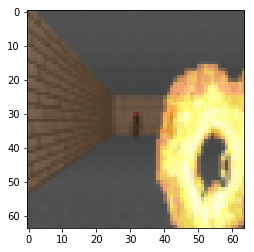

In [5]:
import os
import sys
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

#Testing the implemenetion of explosion-detector
from count_monsters_and_balls import is_there_a_big_explosion
#print(is_there_a_big_explosion(one_image, 0.5))
print(is_there_a_big_explosion(explosion_image,0.5))
plt.imshow(explosion_image)


In [6]:
from test_creativity_stability import count_events_from_images
image_data = count_events_from_images(data[9])
print("Num img without explosion: ", len(image_data["without_explosion"]))
print("Num img with explosion: ", len(image_data["with_explosion"]))

Num img without explosion:  199
Num img with explosion:  15


Images with explosion: 


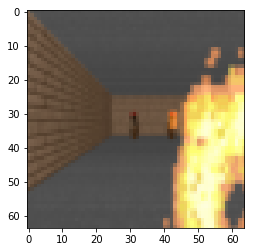

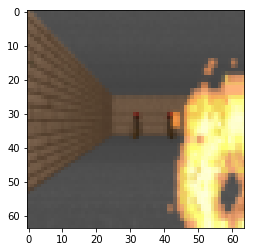

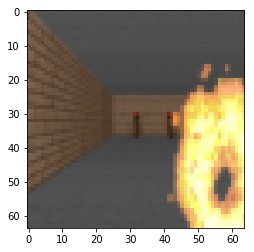

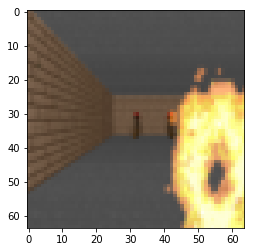

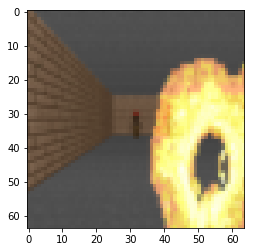

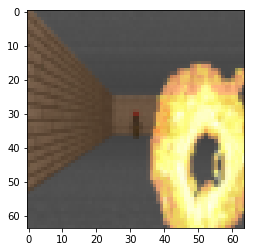

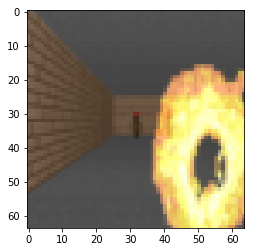

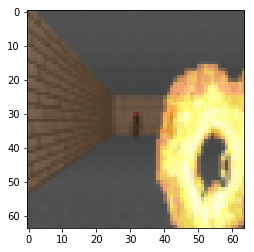

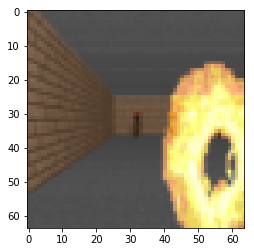

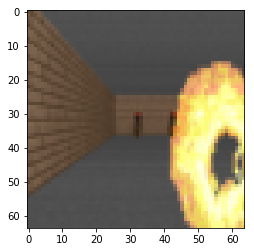

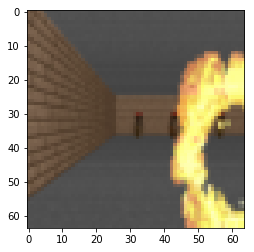

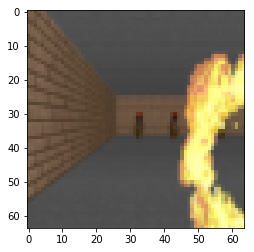

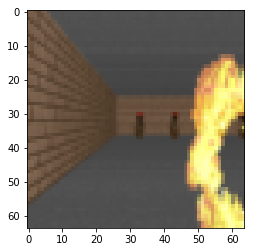

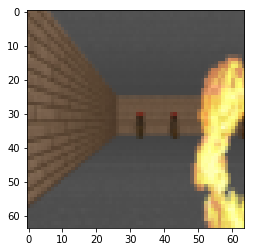

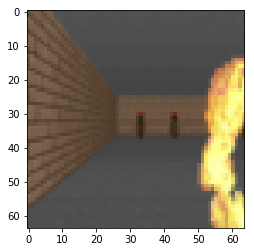

In [7]:
print("Images with explosion: ")
for img in image_data["with_explosion"]:
    plt.figure()
    plt.imshow(img)

Images without explosion: 


/home/kaiolae/.virtualenvs/world_models_new/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


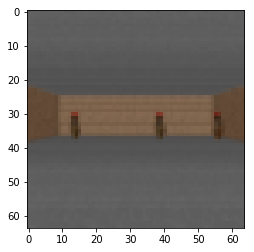

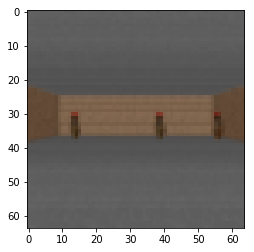

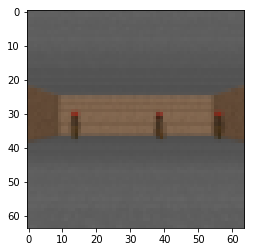

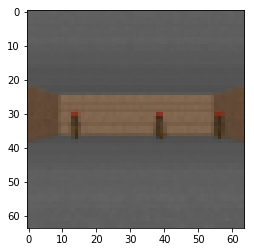

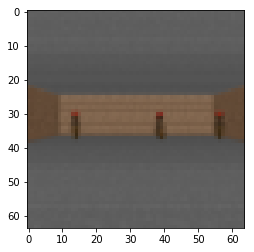

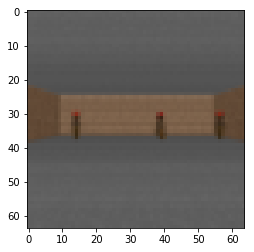

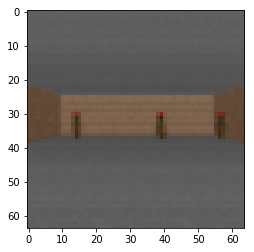

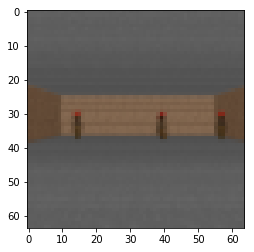

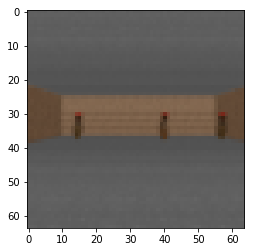

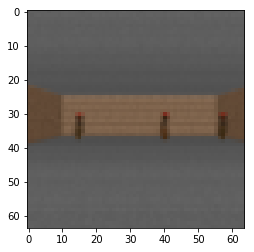

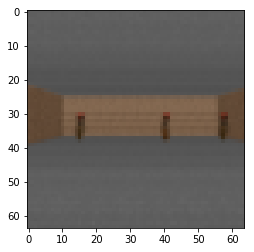

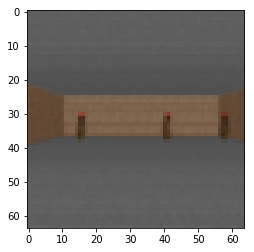

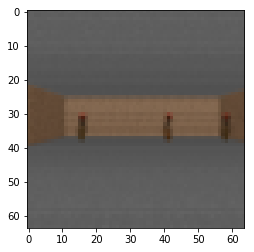

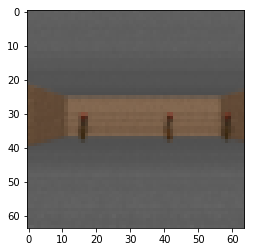

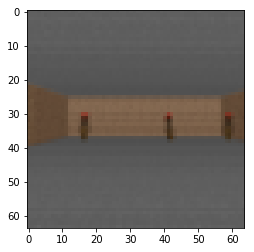

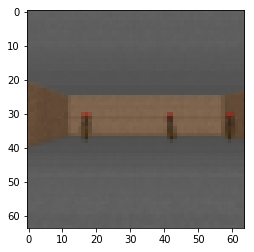

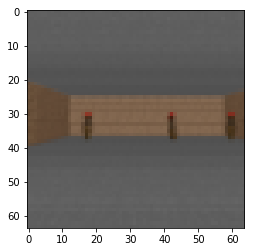

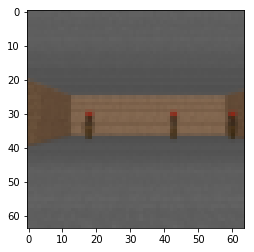

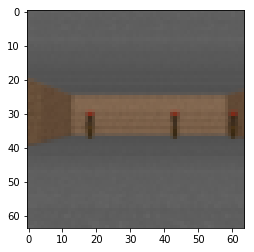

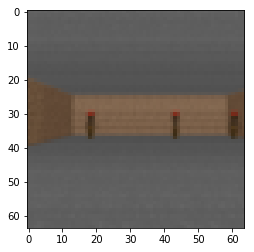

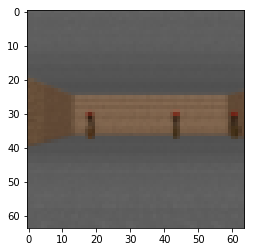

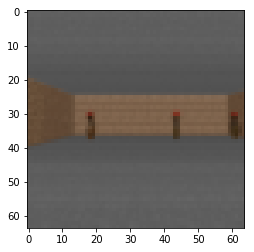

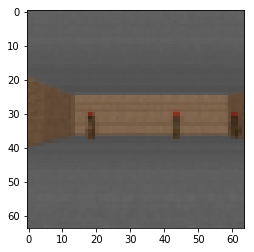

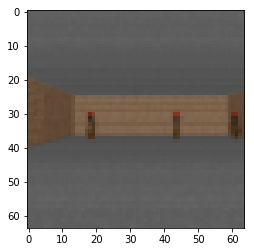

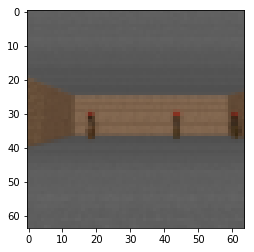

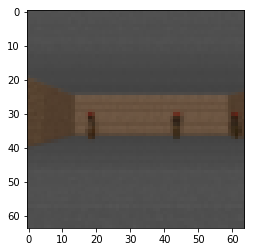

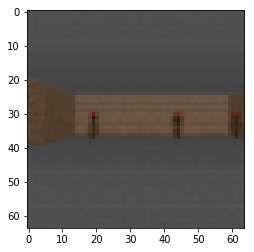

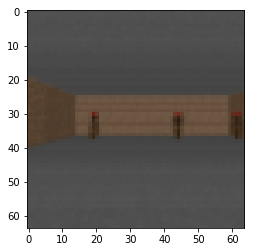

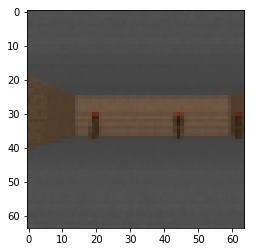

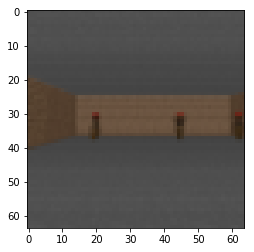

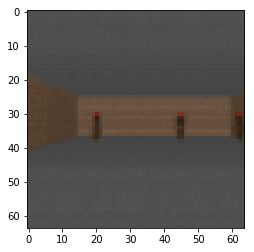

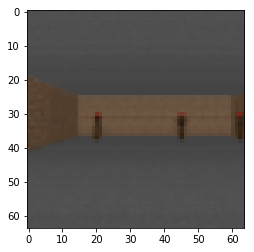

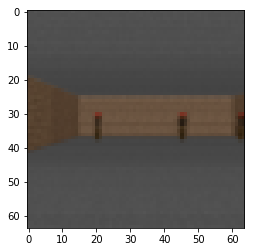

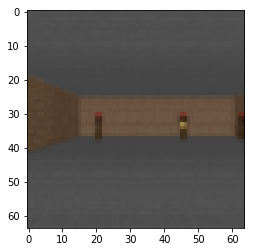

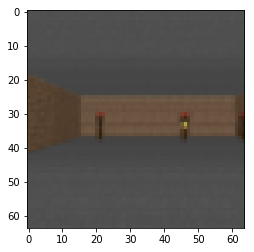

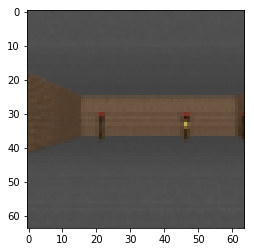

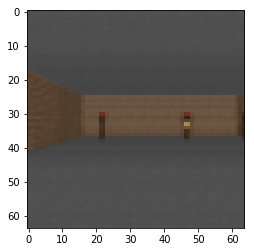

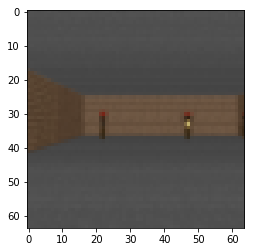

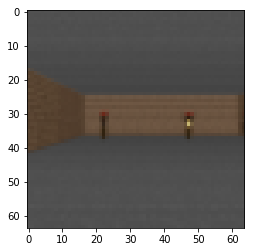

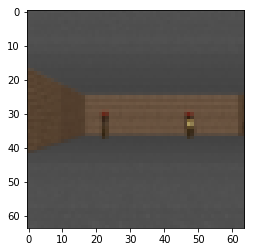

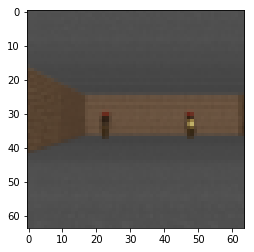

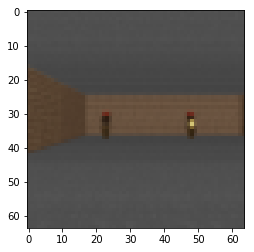

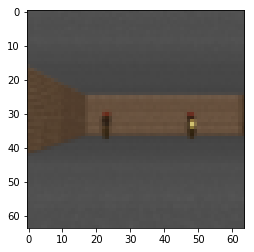

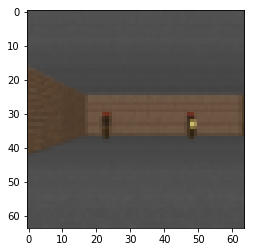

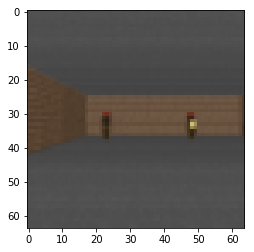

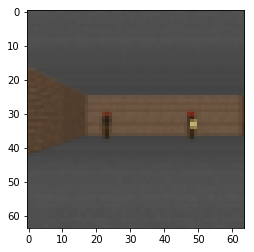

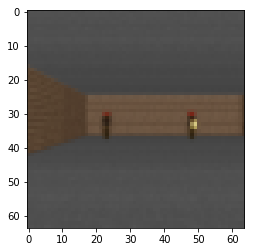

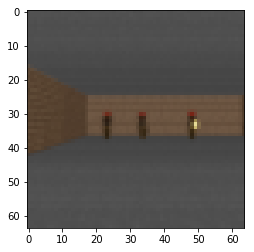

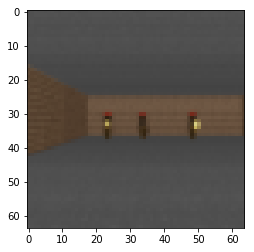

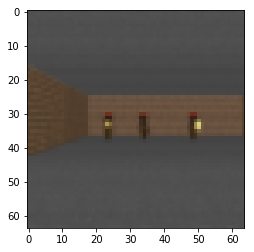

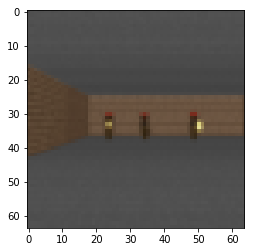

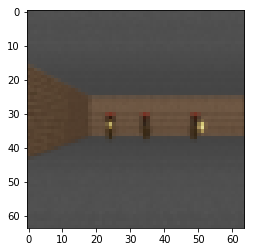

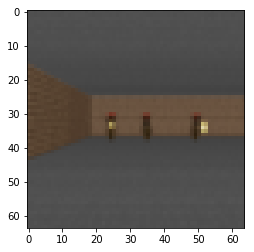

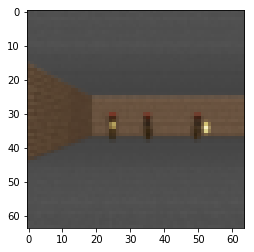

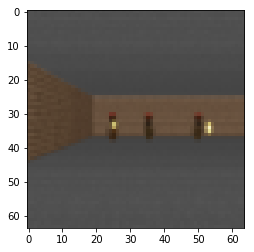

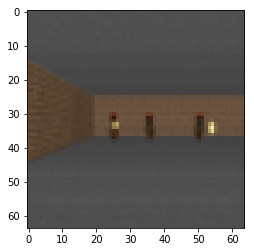

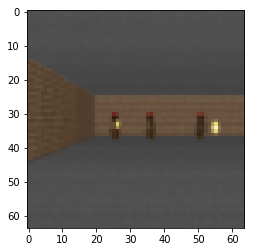

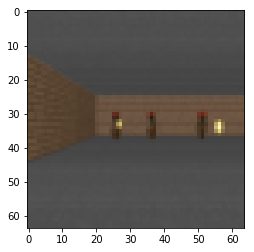

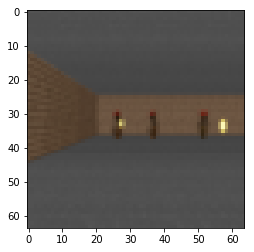

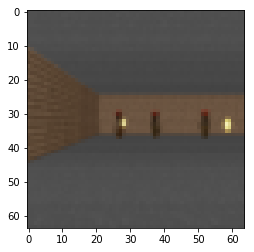

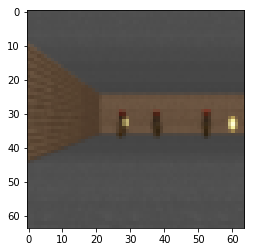

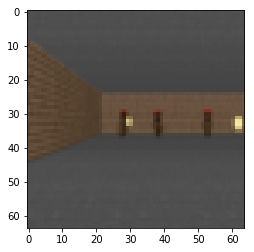

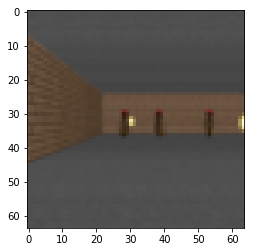

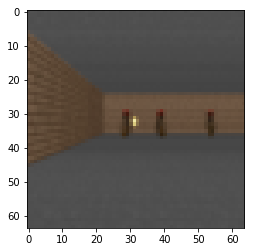

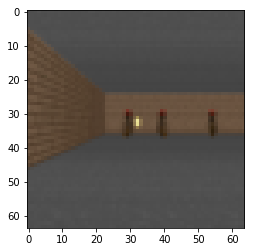

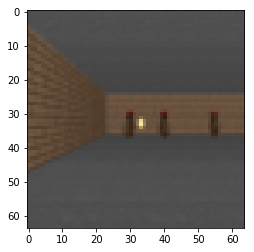

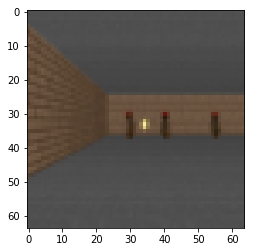

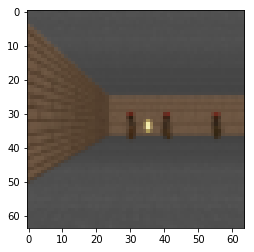

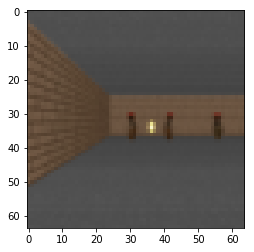

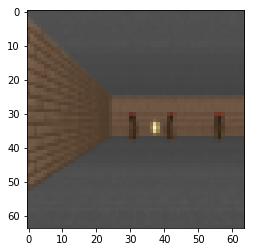

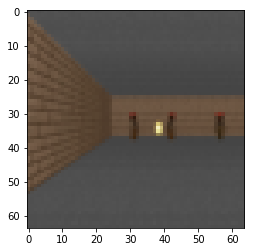

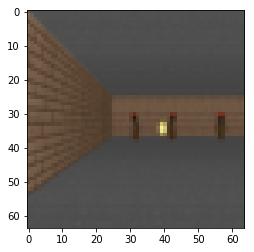

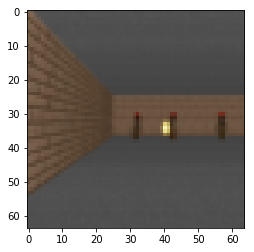

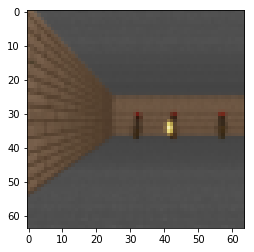

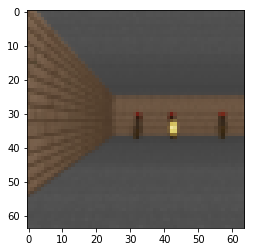

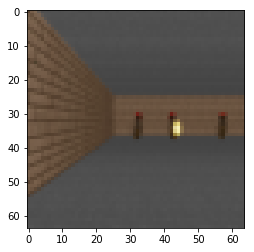

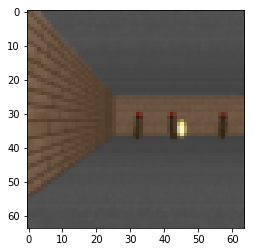

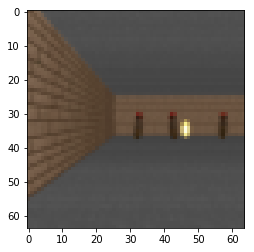

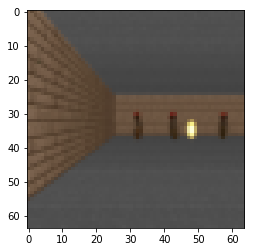

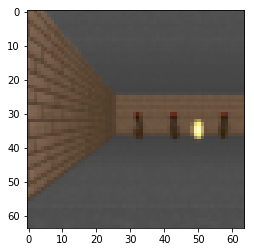

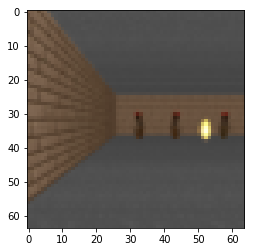

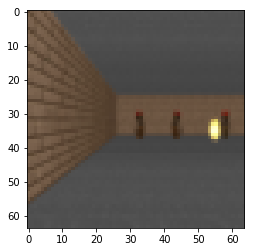

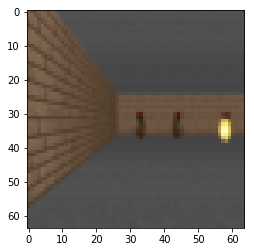

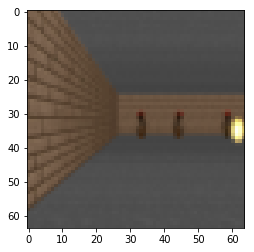

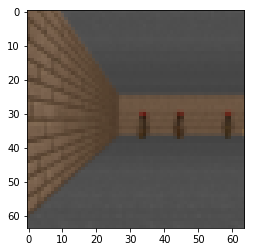

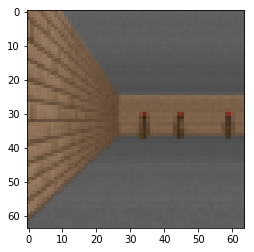

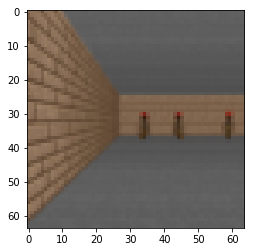

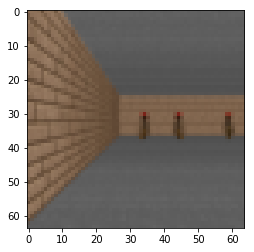

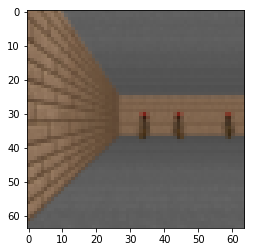

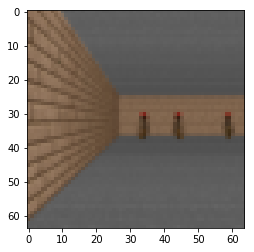

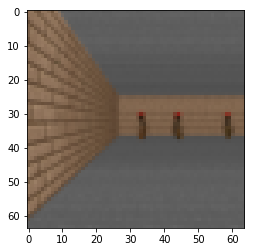

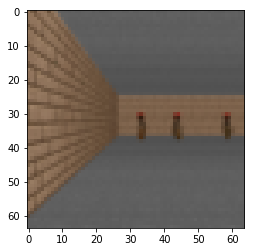

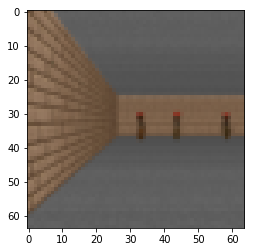

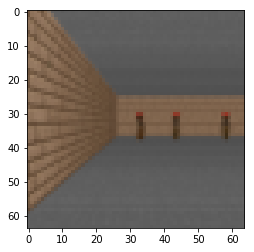

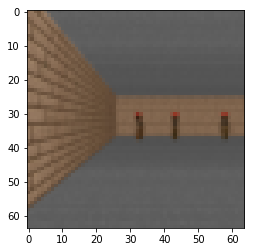

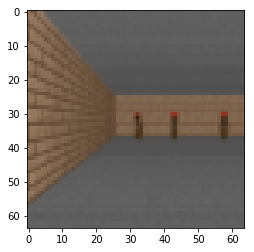

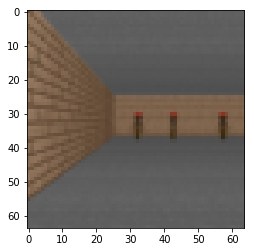

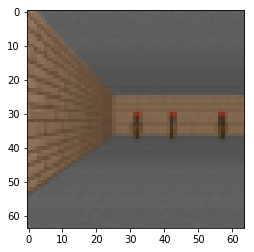

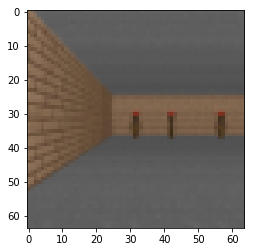

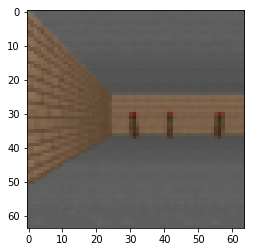

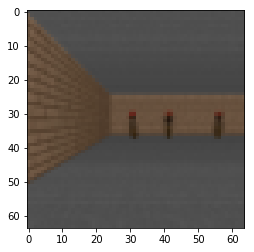

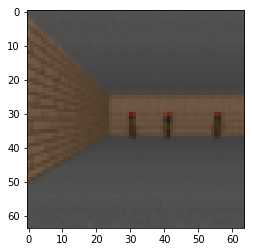

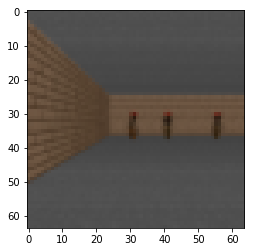

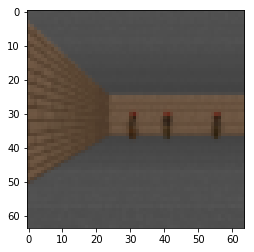

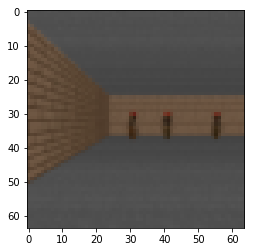

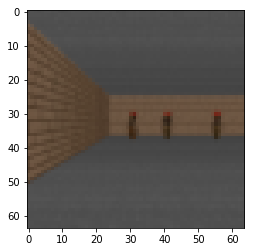

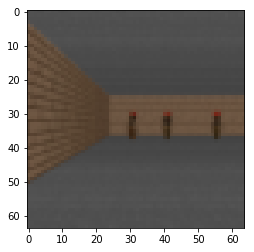

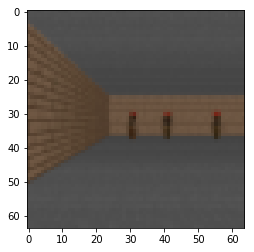

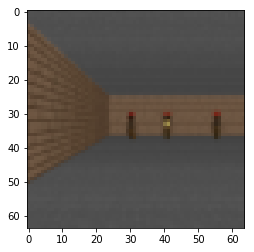

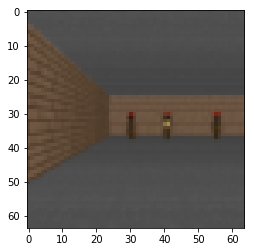

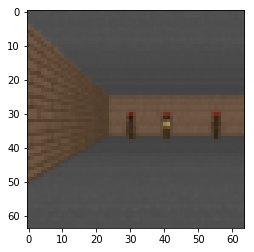

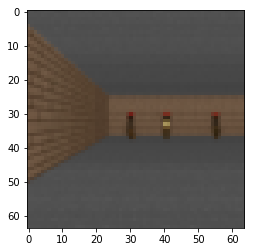

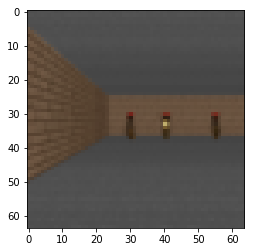

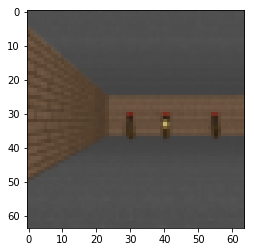

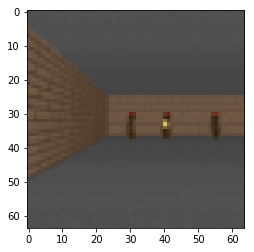

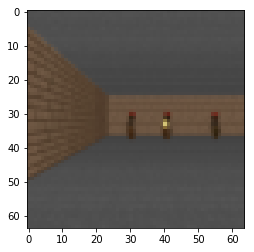

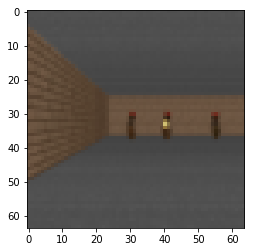

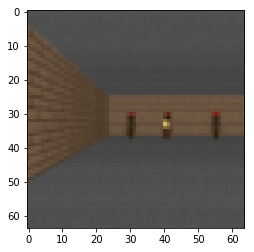

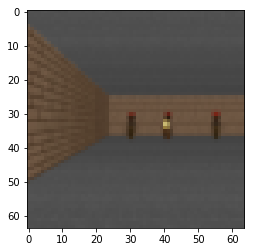

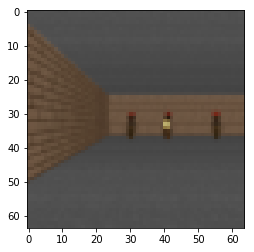

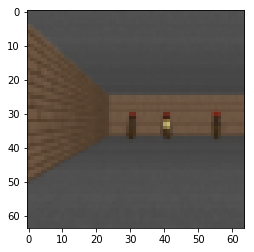

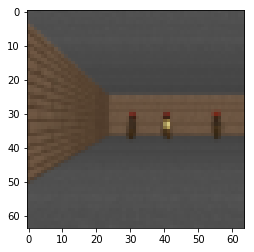

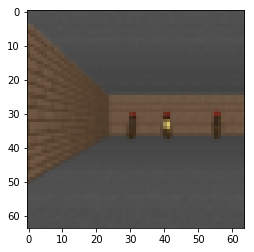

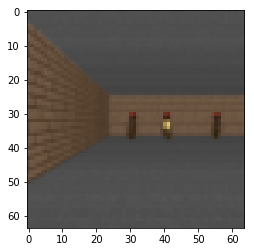

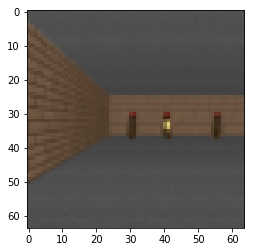

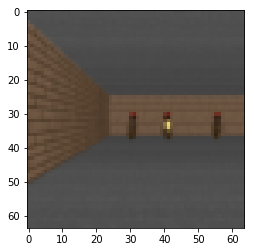

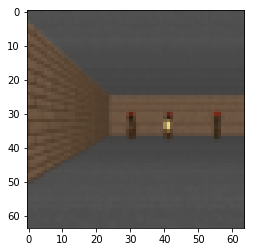

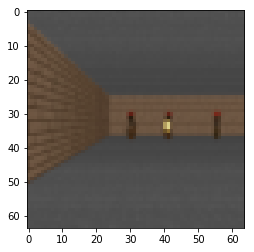

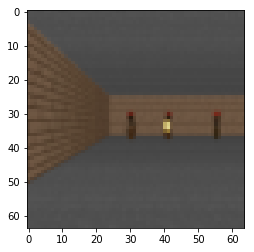

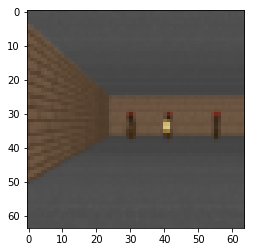

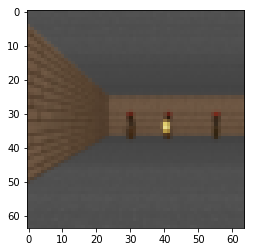

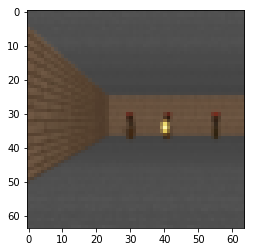

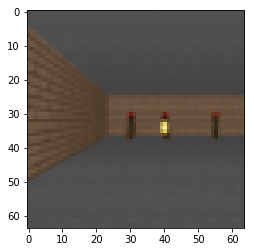

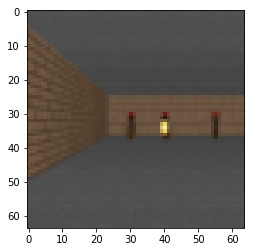

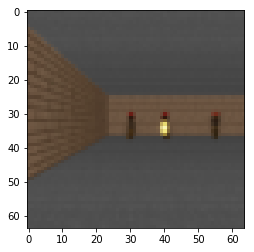

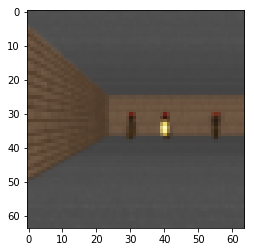

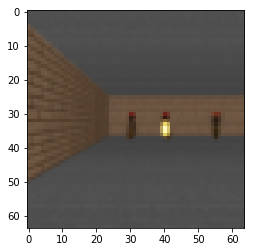

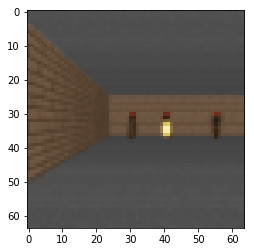

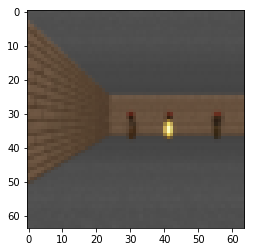

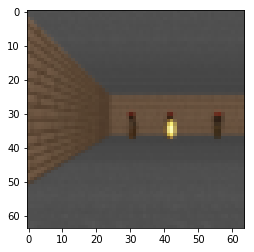

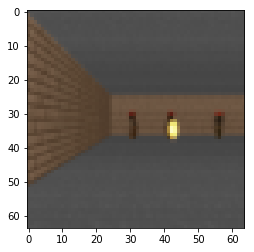

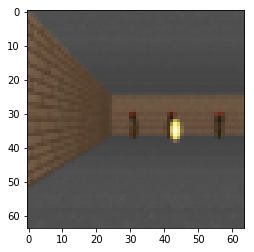

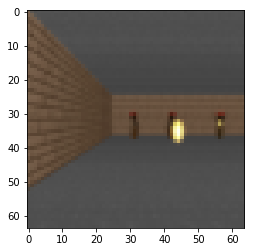

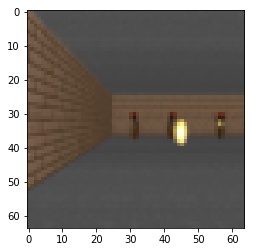

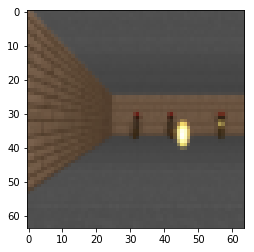

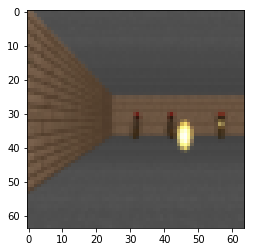

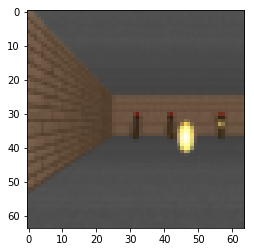

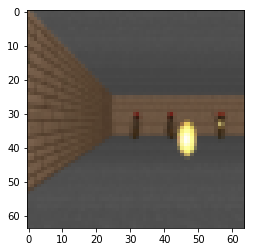

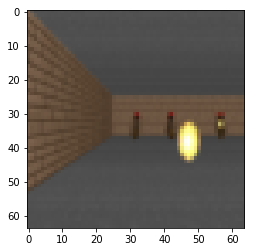

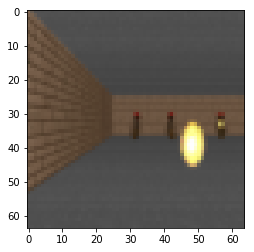

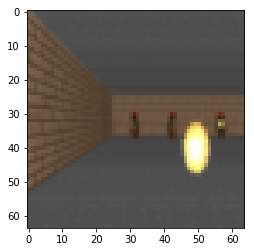

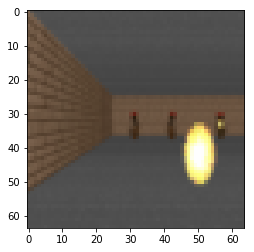

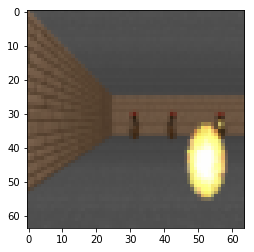

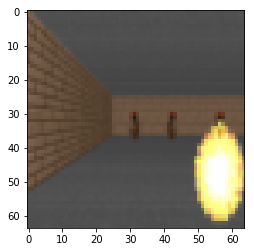

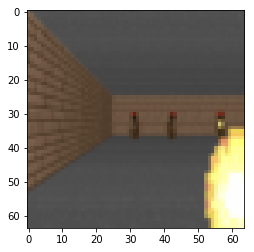

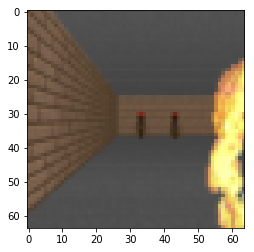

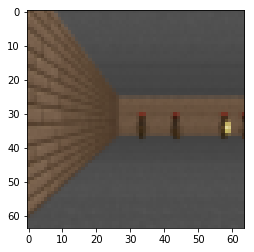

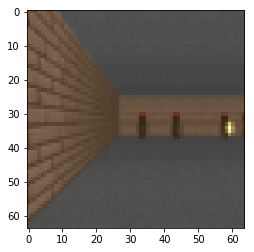

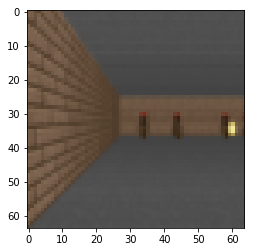

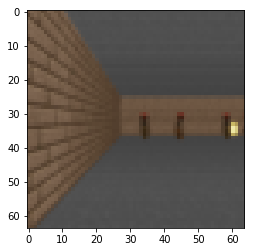

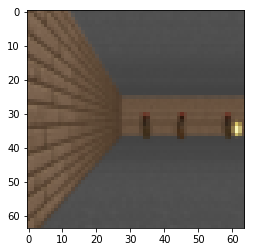

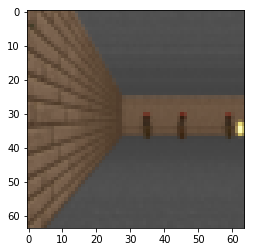

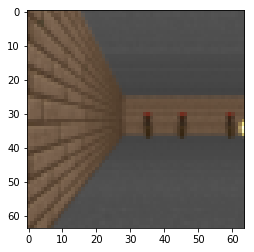

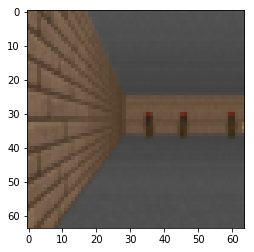

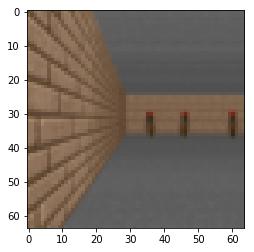

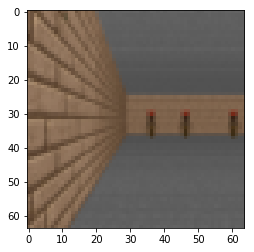

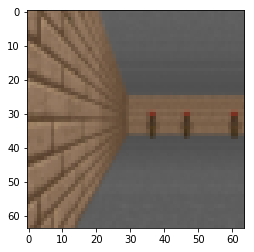

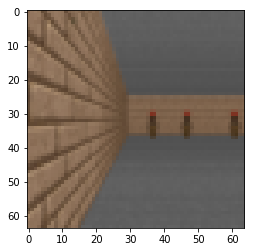

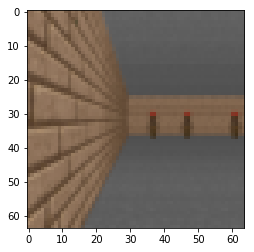

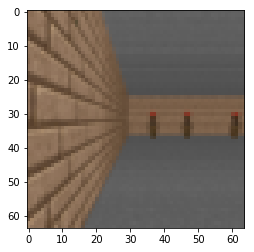

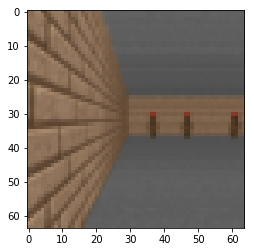

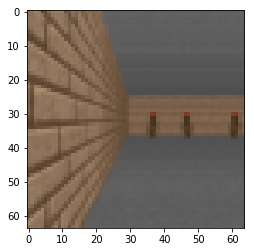

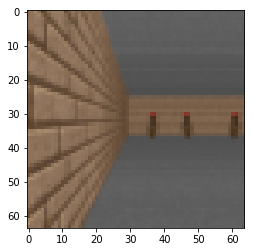

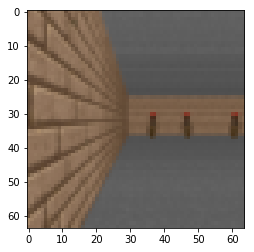

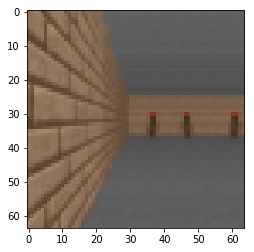

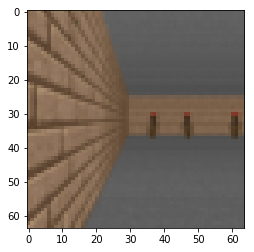

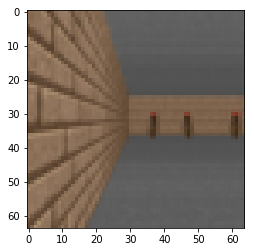

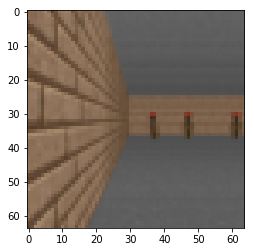

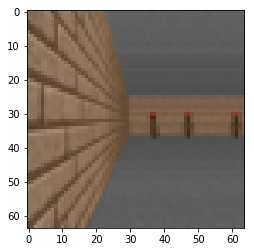

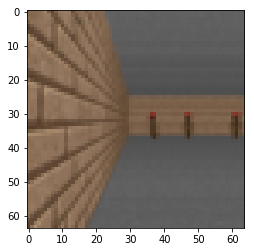

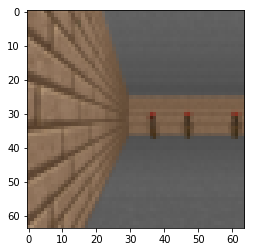

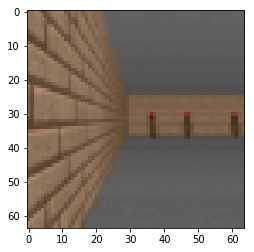

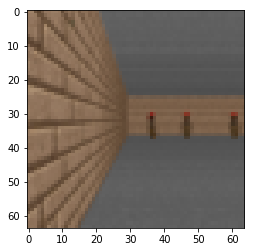

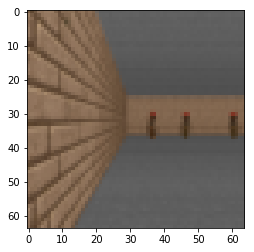

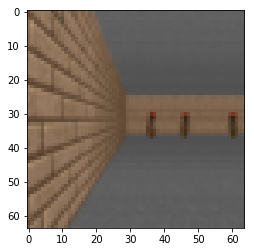

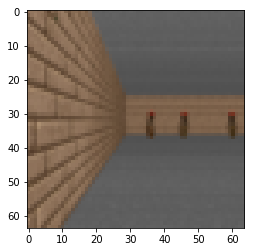

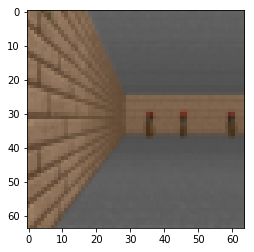

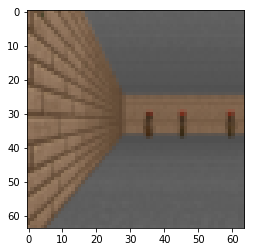

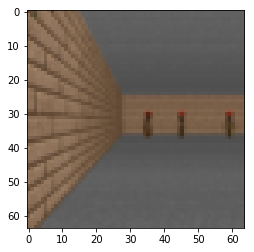

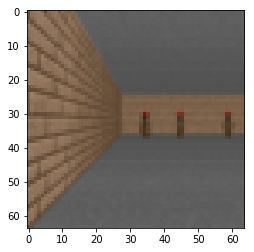

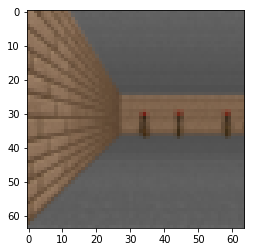

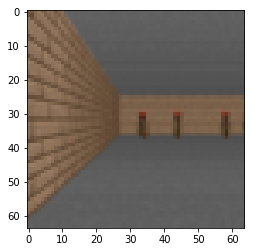

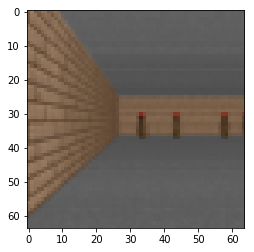

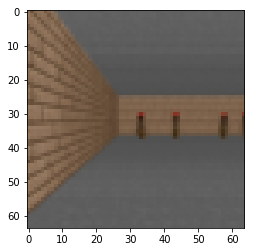

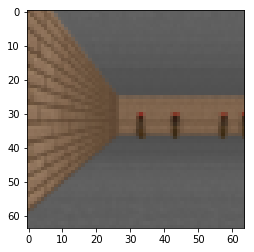

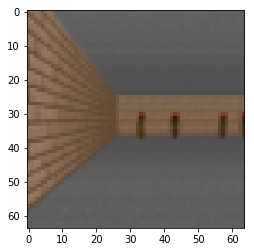

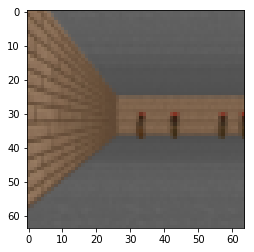

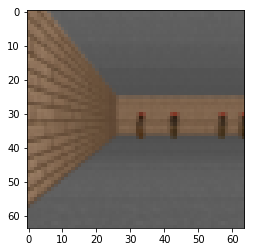

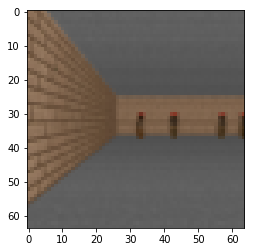

In [8]:
print("Images without explosion: ")
for img in image_data["without_explosion"]:
    plt.figure()
    plt.imshow(img)

96


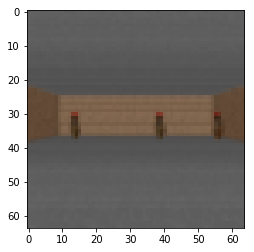

In [9]:
#Testing automatic wall detection
#Wall has gray-color near 0.46. Floor/ceiling is near 0.36. Setting threshold 0.41.
img_without_wall = data[9][0] #Image 22 from first rollout
plt.imshow(img_without_wall)
im = color.rgb2gray(img_without_wall)
print(img_without_wall[0,0,0])

(64, 64, 3)
78


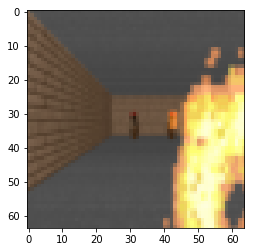

In [10]:
#Testing automatic wall detection
#Wall has gray-color near 0.46. Floor/ceiling is near 0.36. Setting threshold 0.41.
img_with_left_wall = data[9][155] #Image 22 from first rollout
plt.imshow(img_with_left_wall)
im = color.rgb2gray(img_with_left_wall)
print(img_with_left_wall.shape)
print(img_with_left_wall[0,-1,0])

In [13]:
from count_monsters_and_balls import is_there_a_lefthand_wall, is_there_a_righthand_wall
print(is_there_a_lefthand_wall(img_with_left_wall, 95))
print(is_there_a_righthand_wall(img_with_left_wall, 95))

True
False


In [26]:
left_wall_pictures = []
right_wall_pictures = []
no_wall_pictures = []
wall_threshold = 100
for img in data[7]: #9
    if is_there_a_lefthand_wall(img, wall_threshold):
        left_wall_pictures.append(img)
    elif is_there_a_righthand_wall(img, wall_threshold):
        right_wall_pictures.append(img)
    else:
        no_wall_pictures.append(img)
    
plot_movie_mp4(no_wall_pictures)

<Figure size 64x64 with 0 Axes>

In [27]:
plot_movie_mp4(left_wall_pictures)

IndexError: list index out of range

In [28]:
plot_movie_mp4(right_wall_pictures)

<Figure size 64x64 with 0 Axes>